In [35]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook

<IPython.core.display.Javascript object>


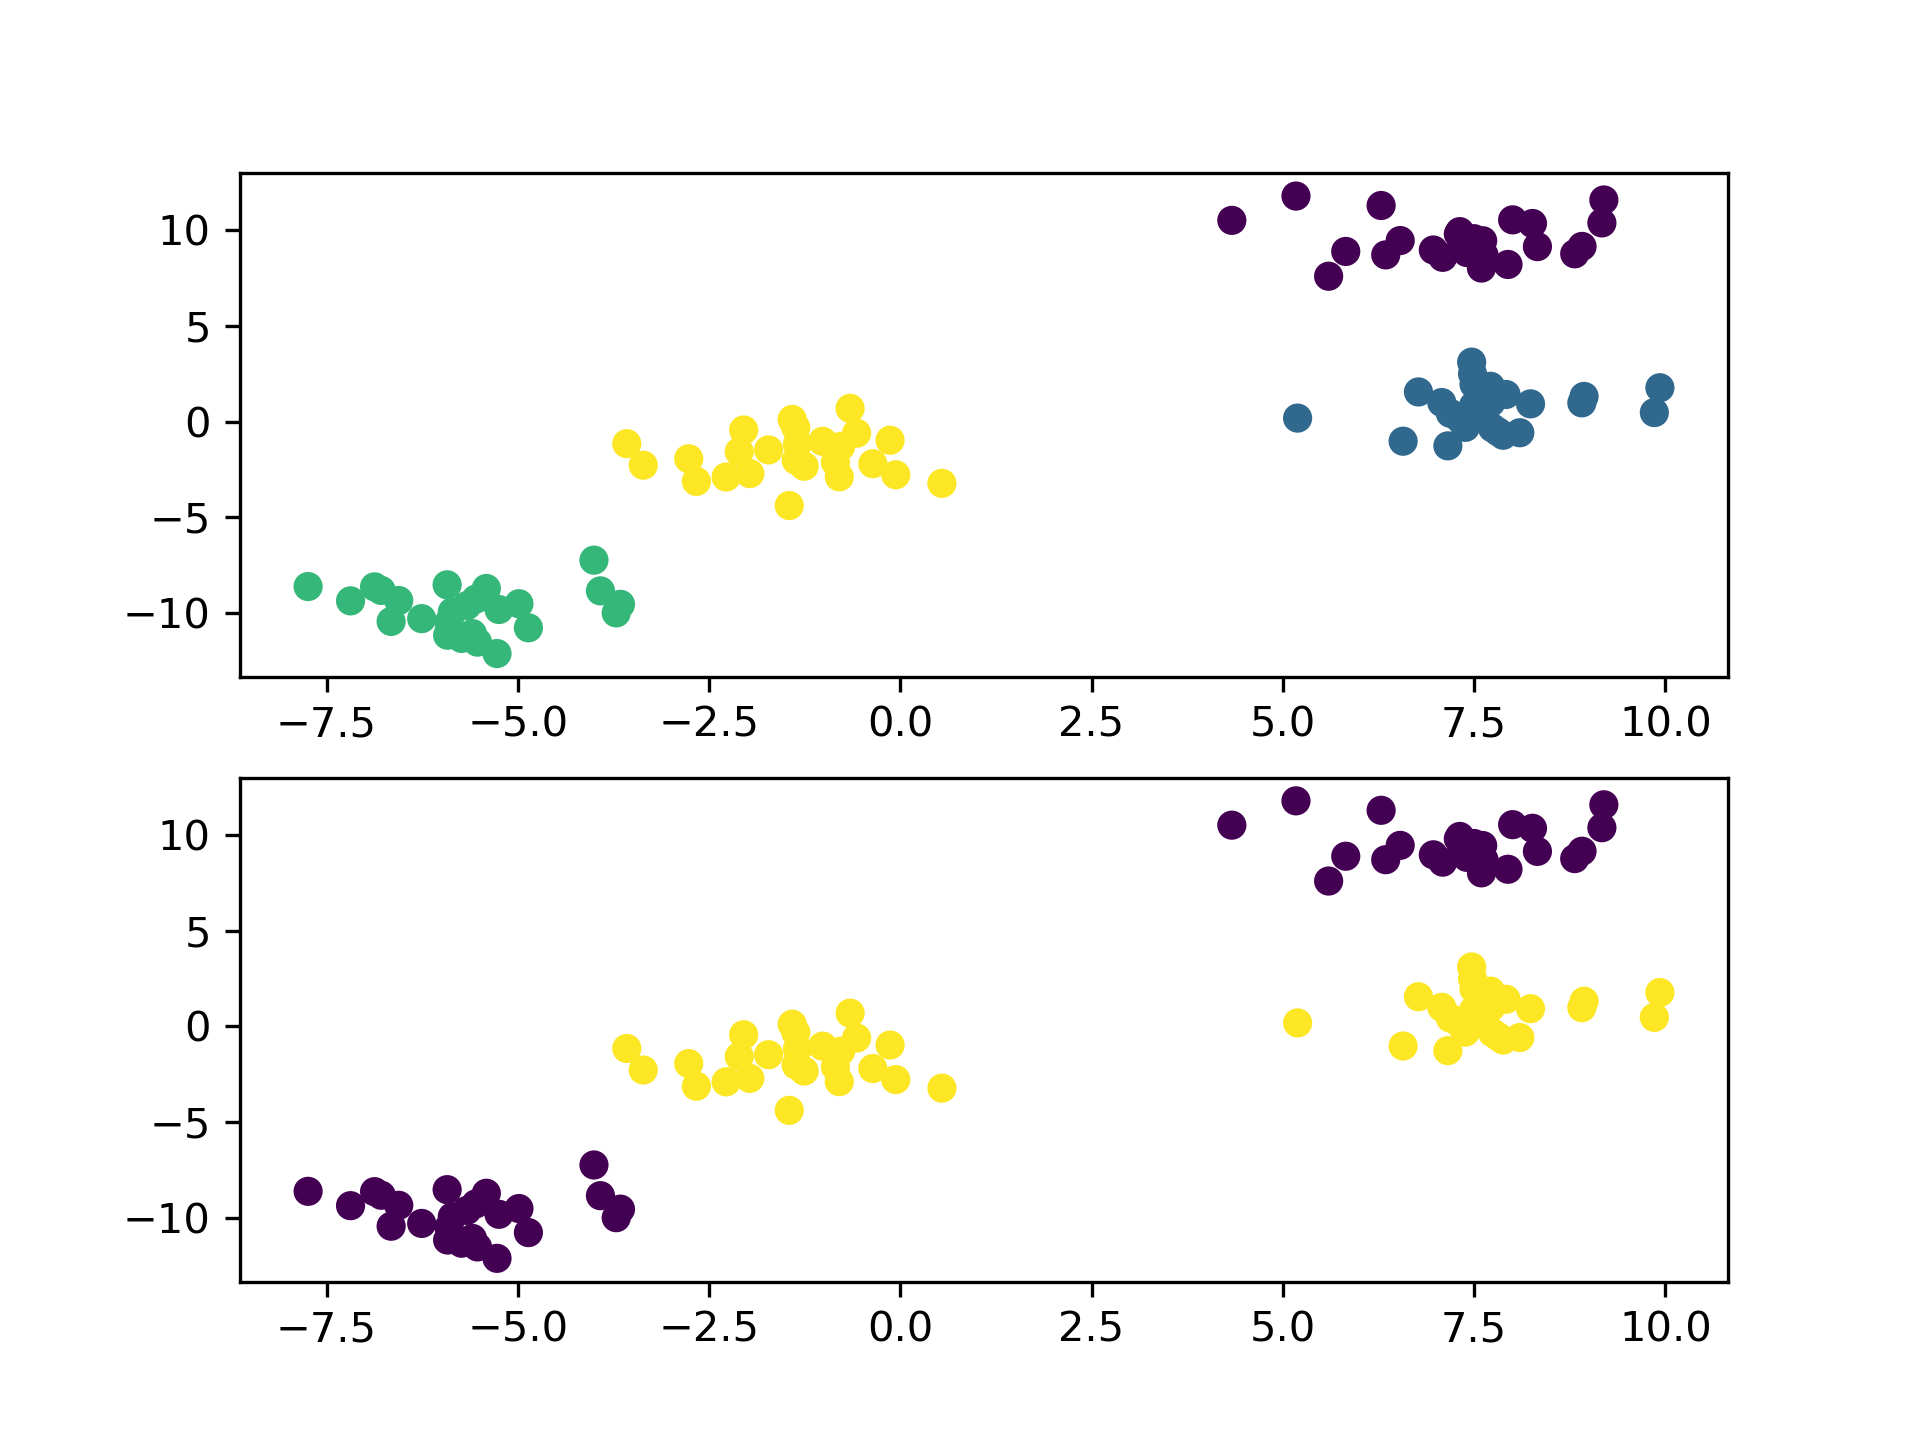

((100, 2), (100,))

In [2]:
X, y = sklearn.datasets.make_blobs(centers=4, random_state=8)
fig, axes = plt.subplots(2, 1)
ax = axes[0]
ax.scatter(X[:, 0], X[:, 1], c=y)

ax=axes[1]
y = y % 2
ax.scatter(X[:, 0], X[:, 1], c=y)
X.shape, y.shape

In [3]:
from sklearn.svm import LinearSVC
svm = LinearSVC(max_iter=10000).fit(X, y)
svm.coef_,svm.intercept_


(array([[ 0.12606443, -0.09176355]]), array([-0.28169857]))

<IPython.core.display.Javascript object>


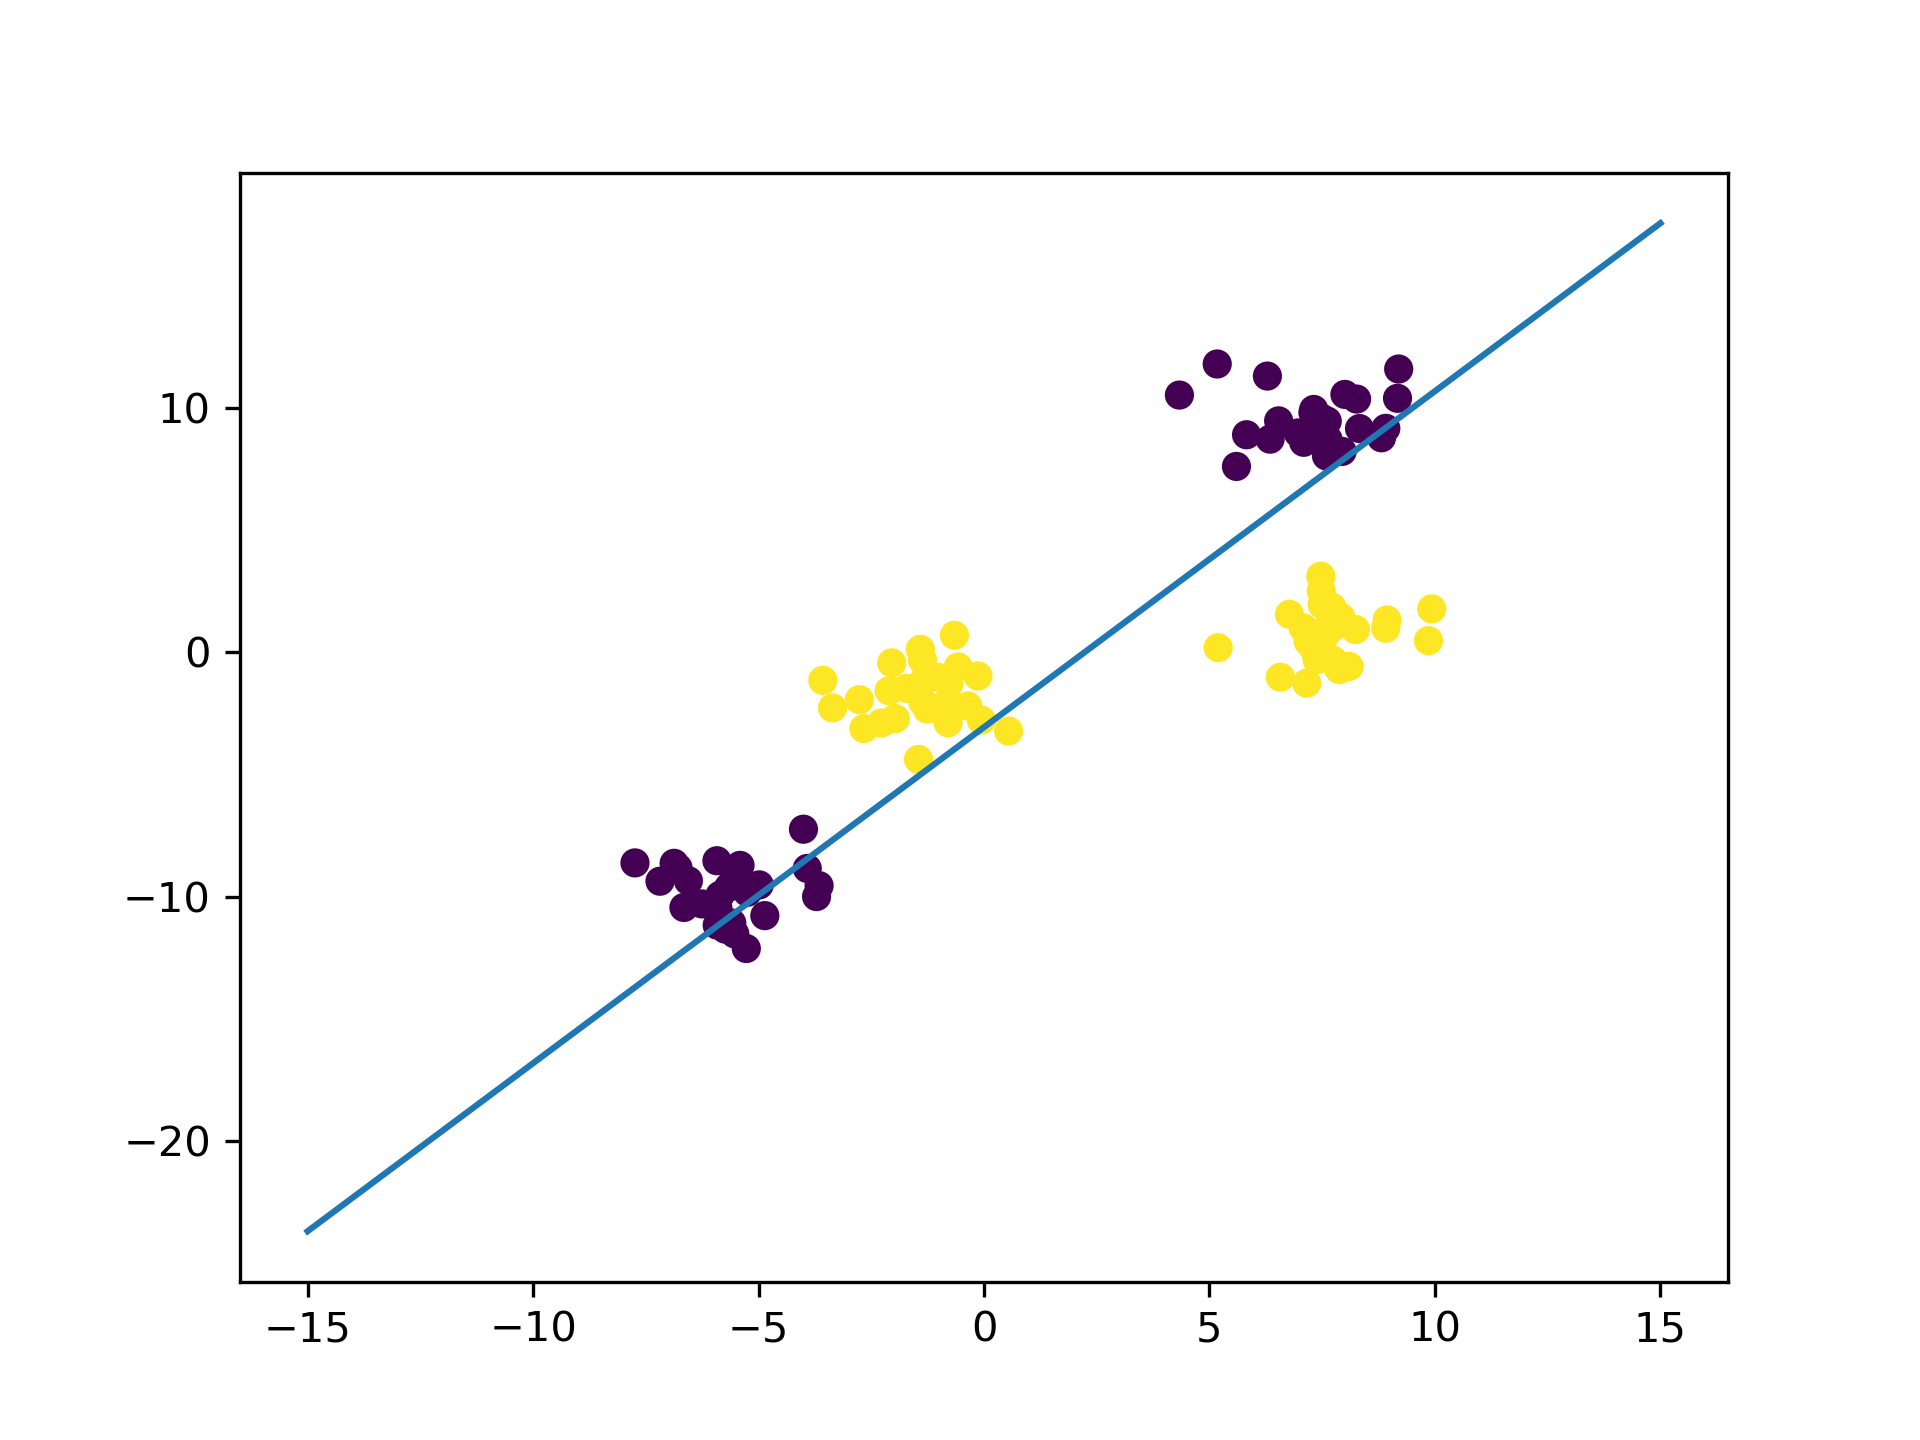

In [4]:
fig, ax = plt.subplots()
xs = np.linspace(-15, 15, 100).reshape(-1, 1)
ax.scatter(X[:,0], X[:,1], c=y)
for coef, intercept in zip(svm.coef_, svm.intercept_):    
    ax.plot(xs, -(coef[0]*xs+intercept)/coef[1])

<IPython.core.display.Javascript object>


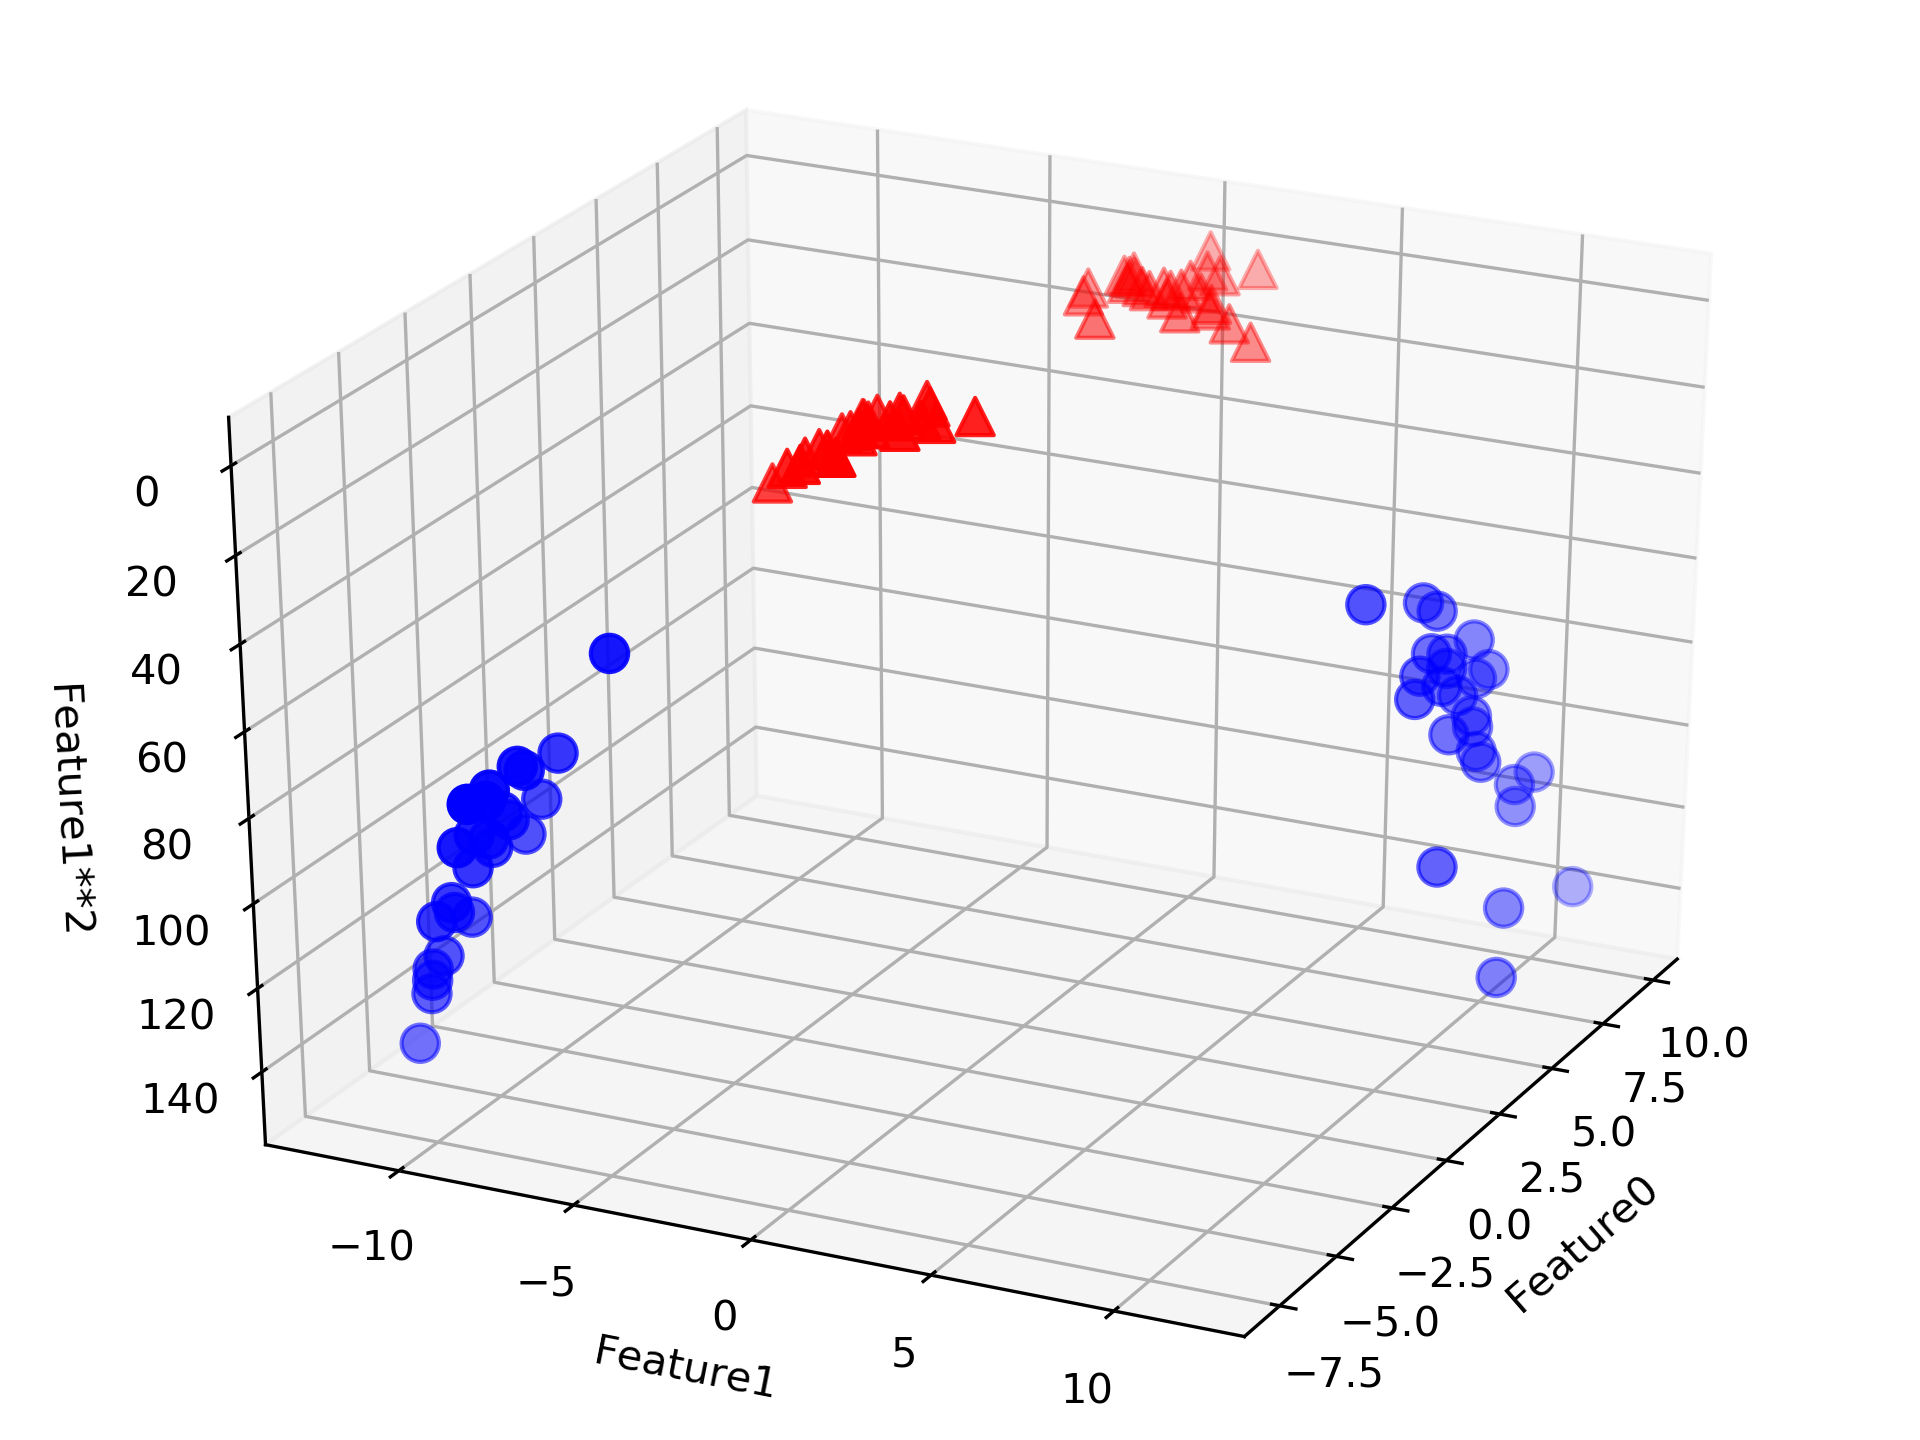

Text(0.5,0,'Feature1**2')

In [5]:
X_new = np.hstack([X, X[:, 1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
fig=plt.figure()
ax=Axes3D(fig, azim=-26, elev=-152)
mask=y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=80)
mask=~mask
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='r', s=80,marker='^')
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1**2")


In [6]:
xx=np.linspace(X_new[:, 0].min()-2, X_new[:, 0].max()+2, 50)
yy=np.linspace(X_new[:, 1].min()-2, X_new[:, 1].max()+2, 50)
XX, YY=np.meshgrid(xx, yy)
svm = LinearSVC().fit(X_new, y)
coef, intercept = svm.coef_.ravel(), svm.intercept_
coef.shape, intercept.shape

/Users/fengp/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


((3,), (1,))

<IPython.core.display.Javascript object>


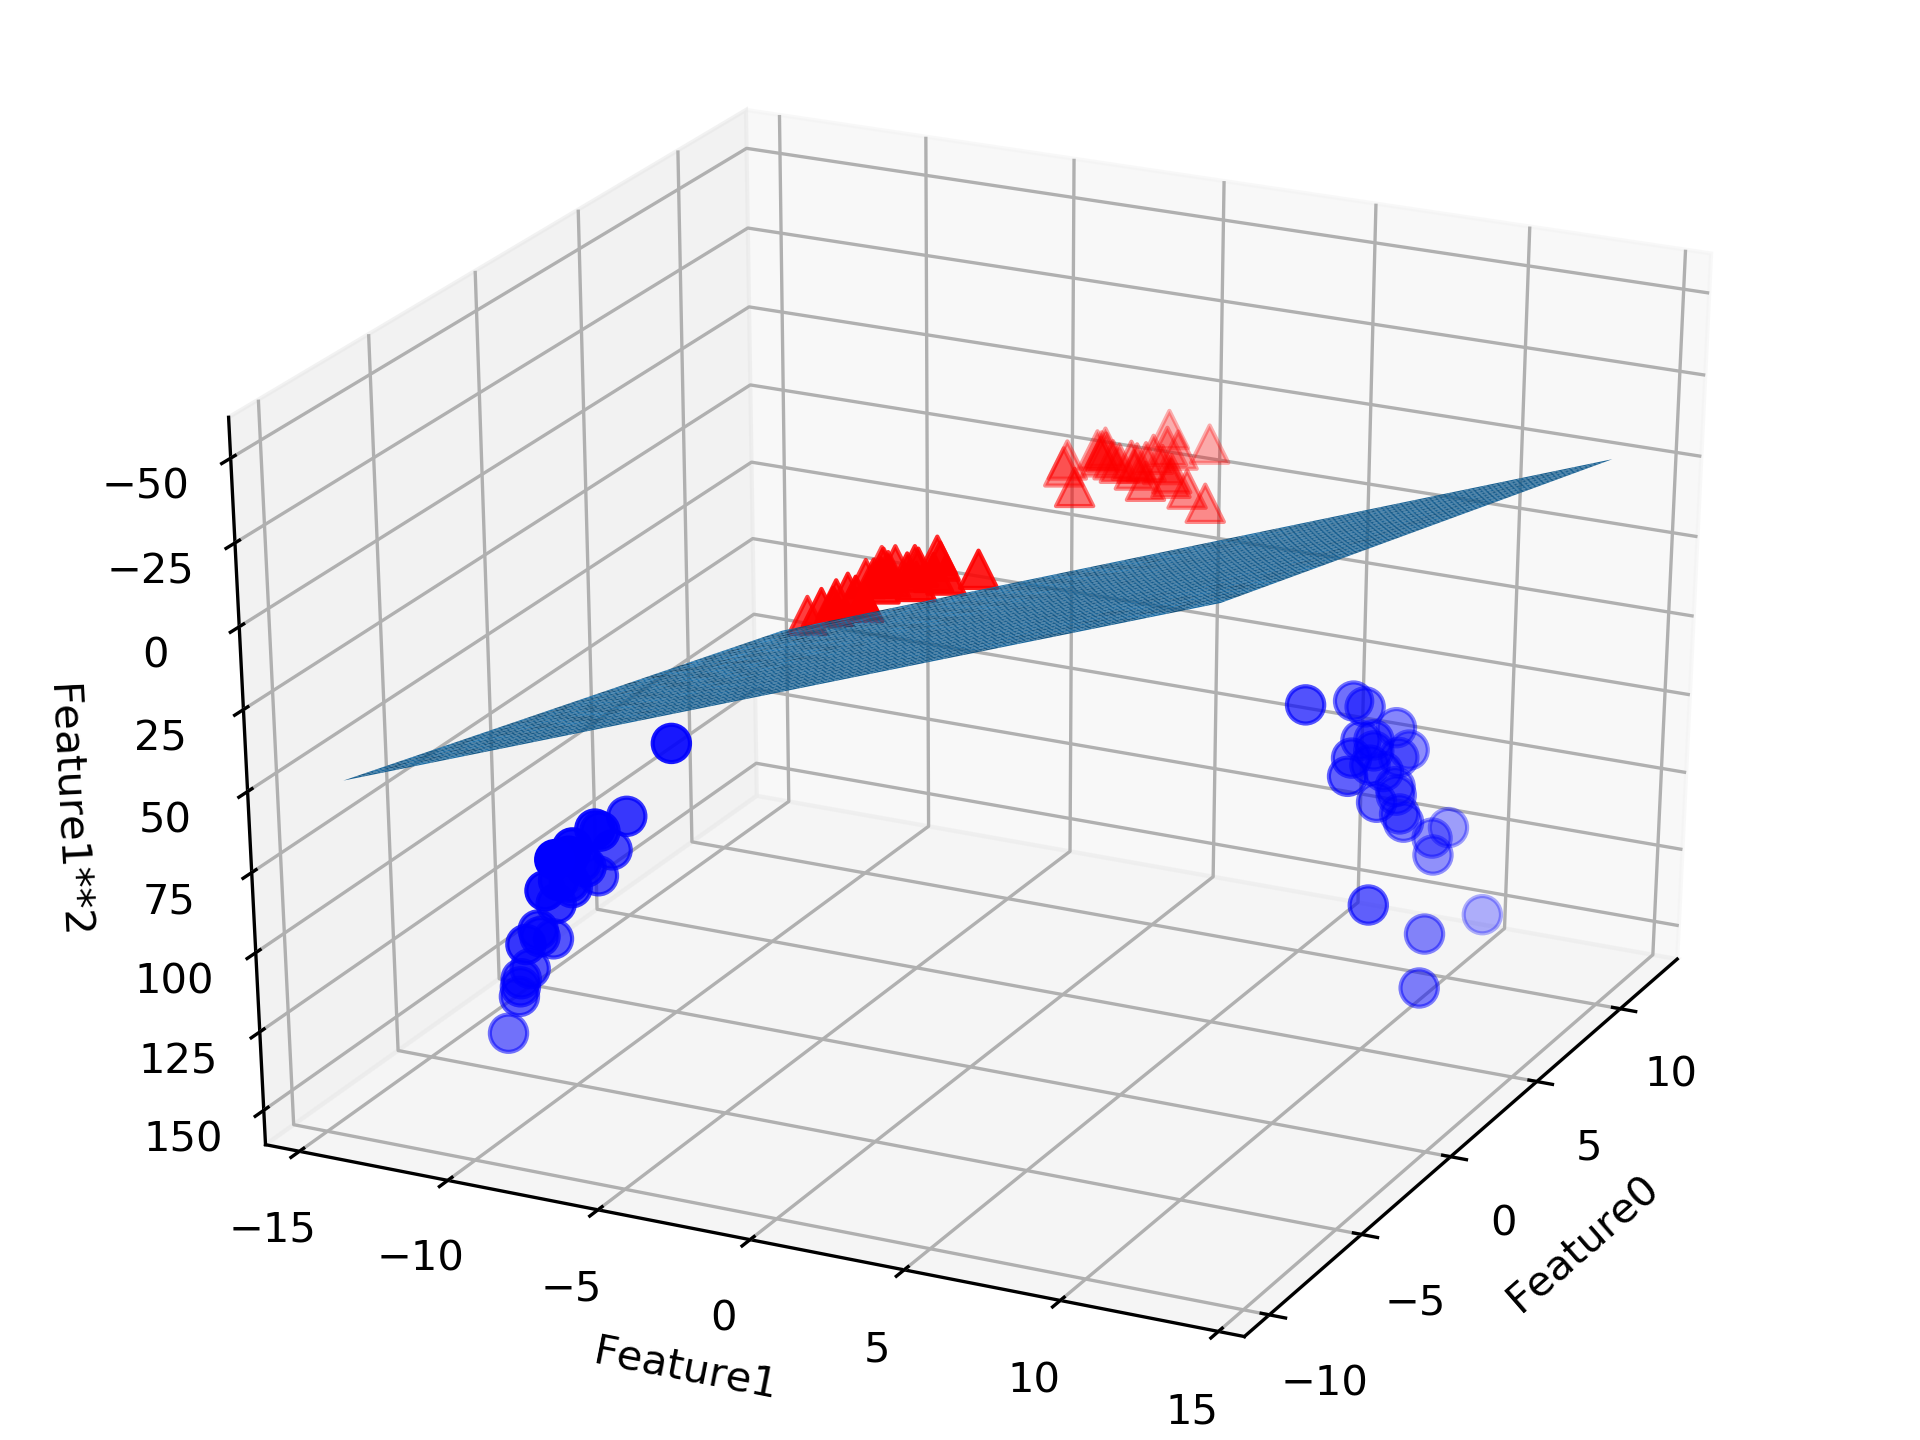

Text(0.5,0,'Feature1**2')

In [7]:
fig = plt.figure()
ax = Axes3D(fig, elev=-152, azim=-26)
ZZ = -(coef[0]*XX+coef[1]*YY+intercept)/coef[2]
ax.plot_surface(XX, YY, ZZ)
mask=y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=80)
mask=y==1
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='r', s=80,marker='^')
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1**2")

<IPython.core.display.Javascript object>


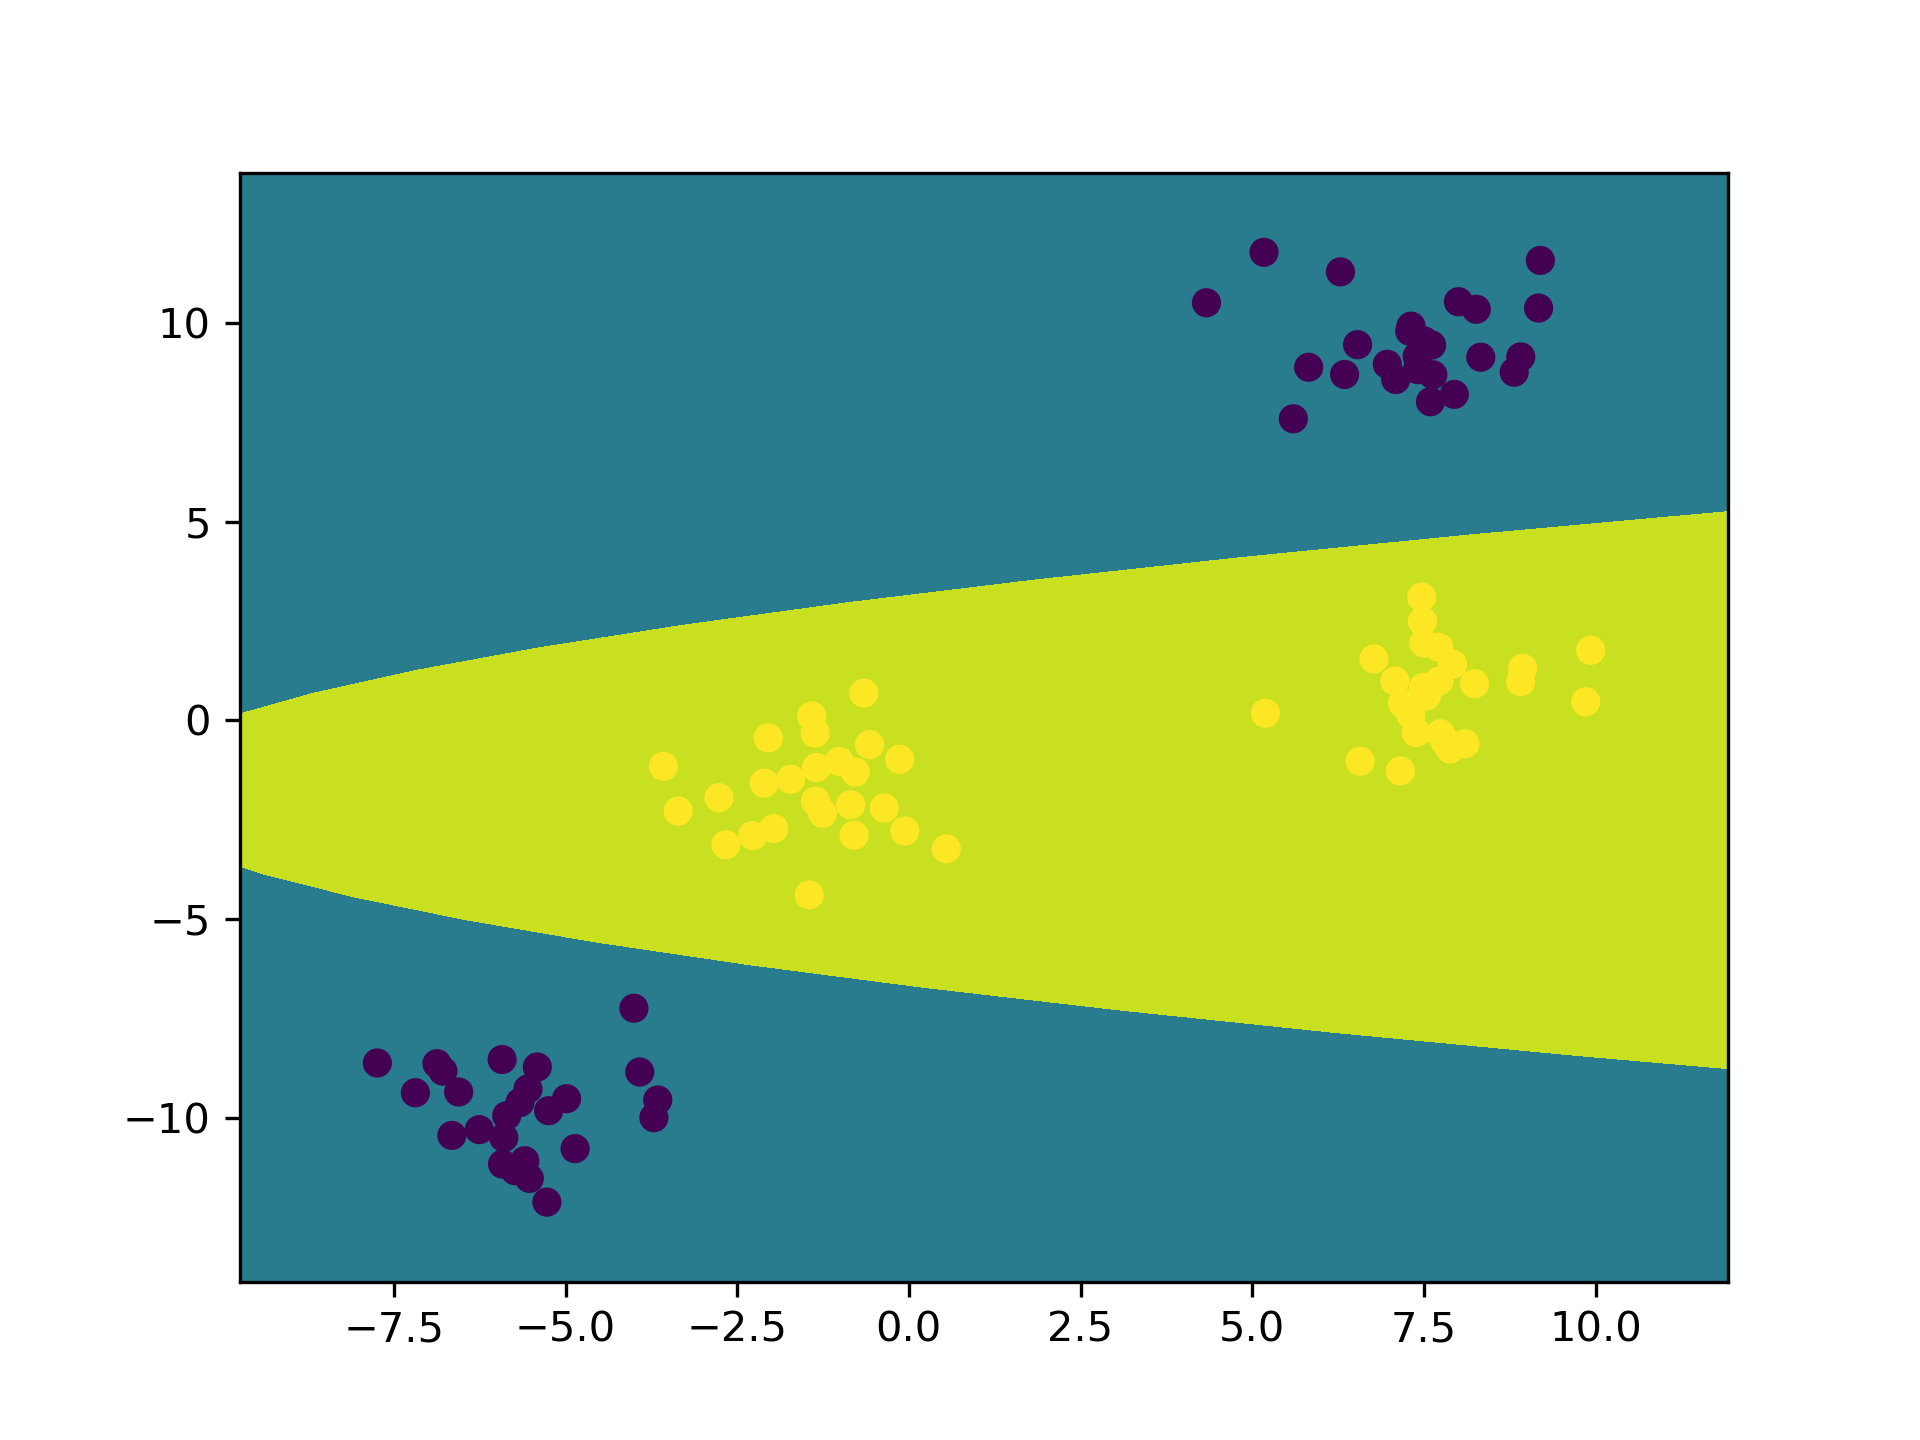

In [30]:
ZZ=YY**2
dec = svm.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
fig, ax=plt.subplots()
ax.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()])
ax.scatter(X[:, 0],X[:,1],c=y)

In [25]:
X.shape, y.shape

NameError: name 'group' is not defined

<IPython.core.display.Javascript object>


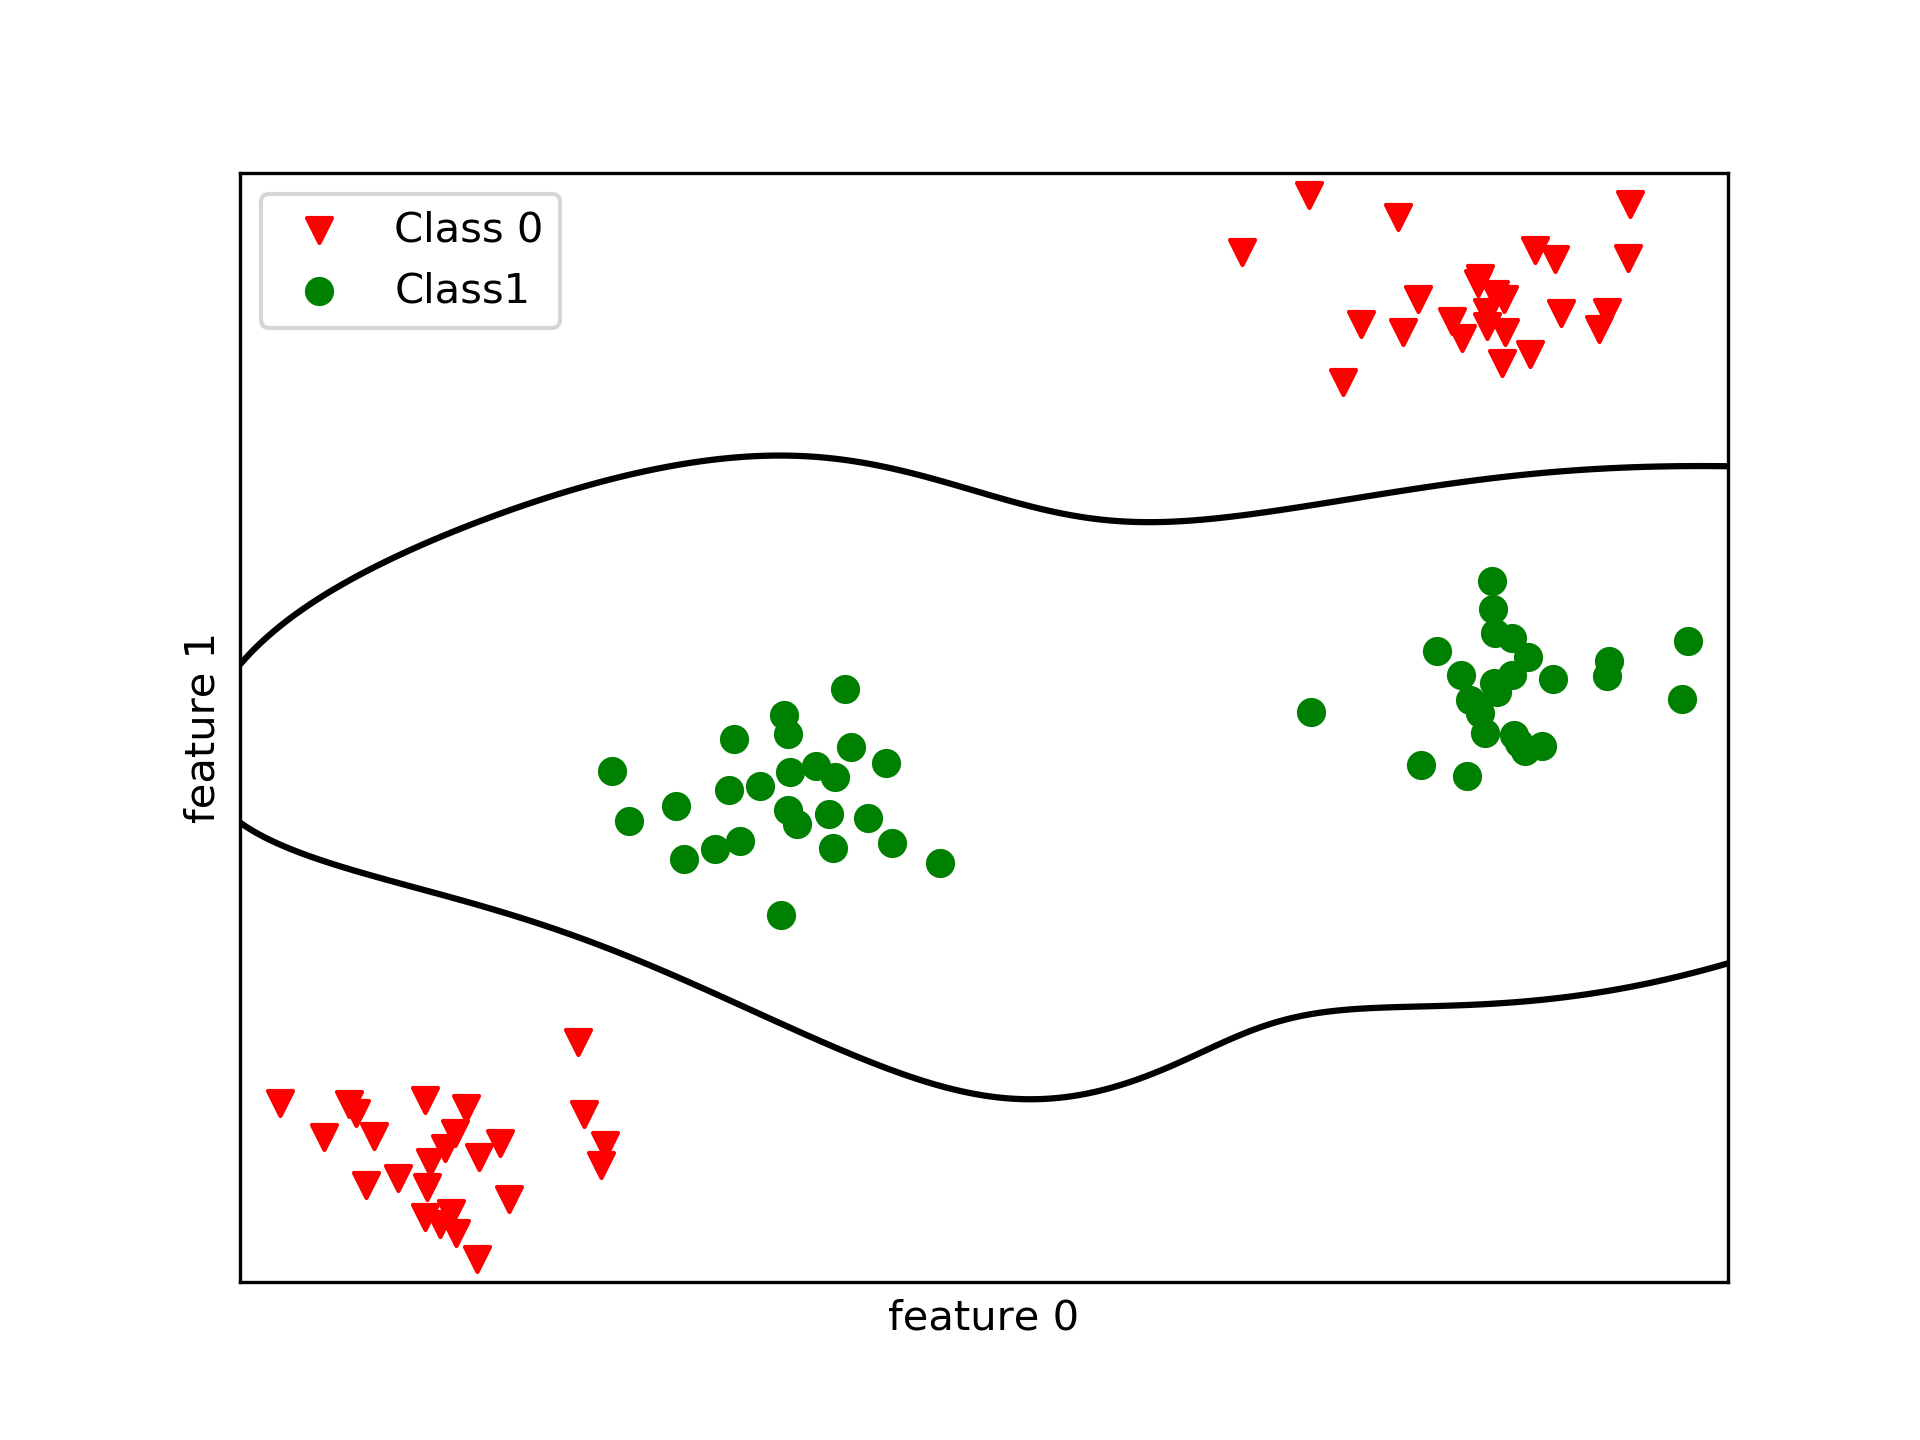

In [32]:
from sklearn.svm import SVC
fig, ax=plt.subplots()
svm_kernel = SVC(kernel='rbf',C=10,gamma=.1).fit(X, y)
#mglearn.plots.plot_2d_separator(svm_kernel, X, eps=.5)
groups=[0, 1]
colors=['r', 'g']
markers=['v', 'o']
labels = ["Class 0", "Class1"]
for group, color, marker, label in zip(groups, colors, markers, labels):
    idx=np.where(y==group)
    ax.scatter(X[idx][:, 0], X[idx][:,1], c=color, marker=marker, label=label)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.legend()
mglearn.plots.plot_2d_separator(svm_kernel, X, eps=.5)


In [40]:
cancer=sklearn.datasets.load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [46]:
svc=SVC(gamma=1)
svc.fit(X_train, y_train)
print('training score: ', svc.score(X_train, y_train))
print('test score: ', svc.score(X_test, y_test))

training score:  1.0
test score:  0.629370629371


<IPython.core.display.Javascript object>


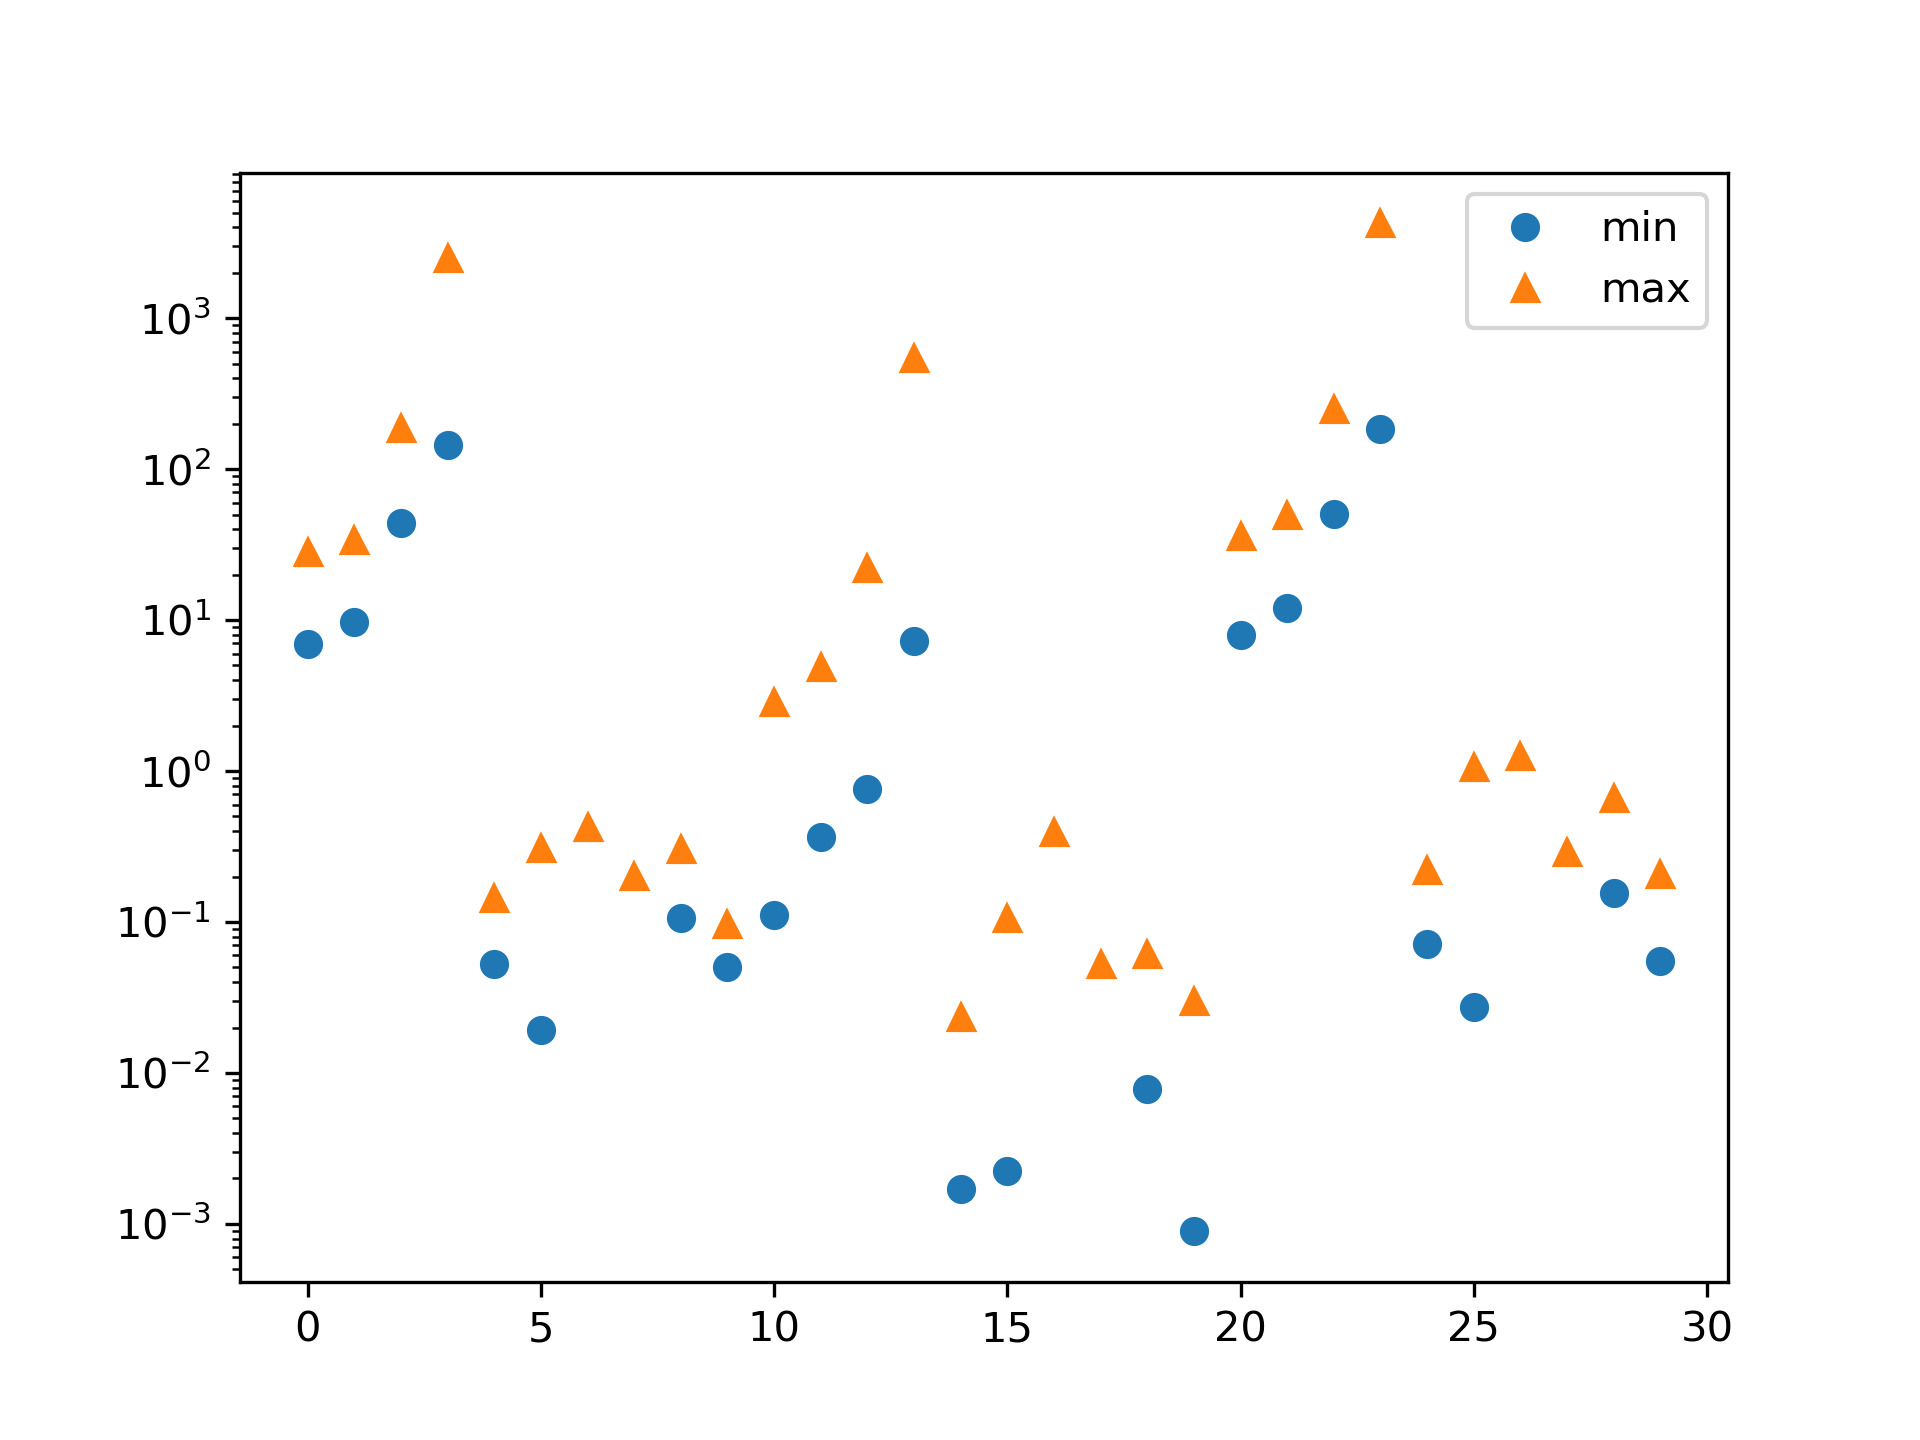

(array([  6.98100000e+00,   9.71000000e+00,   4.37900000e+01,
          1.43500000e+02,   5.26300000e-02,   1.93800000e-02,
          0.00000000e+00,   0.00000000e+00,   1.06000000e-01,
          4.99600000e-02,   1.11500000e-01,   3.62800000e-01,
          7.57000000e-01,   7.22800000e+00,   1.71300000e-03,
          2.25200000e-03,   0.00000000e+00,   0.00000000e+00,
          7.88200000e-03,   8.94800000e-04,   7.93000000e+00,
          1.20200000e+01,   5.04100000e+01,   1.85200000e+02,
          7.11700000e-02,   2.72900000e-02,   0.00000000e+00,
          0.00000000e+00,   1.56500000e-01,   5.50400000e-02]),
 array([  2.81100000e+01,   3.38100000e+01,   1.88500000e+02,
          2.50100000e+03,   1.44700000e-01,   3.11400000e-01,
          4.26800000e-01,   2.01200000e-01,   3.04000000e-01,
          9.74400000e-02,   2.87300000e+00,   4.88500000e+00,
          2.19800000e+01,   5.42200000e+02,   2.33300000e-02,
          1.06400000e-01,   3.96000000e-01,   5.27900000e-02,
      

In [57]:
minx=X_train.min(axis=0)
maxx=X_train.max(axis=0)
xs=np.arange(X_train.shape[1])

fig, ax = plt.subplots()
ax.plot(minx, 'o', label='min')
ax.plot(maxx, '^', label='max')
ax.legend()
ax.set_yscale('log')
minx,maxx,xs

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)
svc = SVC()
svc.fit(X_train_trans, y_train)
print('training score: ', svc.score(X_train_trans, y_train))
print('test score: ', svc.score(X_test_trans, y_test))

training score:  0.983568075117
test score:  0.972027972028
